# Grove I2C Si1151 Sunlight Sensor 

## Aim

* This notebook illustrates how to use available APIs for the Si1151 I2C Sunlight Sensor with grove adaptor on PYNQ-Z2 PMOD py_interfaces.


### References
* [Seeed Sunlight Sensor](https://www.seeedstudio.com/Grove-Sunlight-Sensor.html?queryID=2a3fb0835481f25c58acbcf555a07690&objectID=614&indexName=bazaar_retailer_products)    
* [PYNQ Grove Adapter](https://store.digilentinc.com/pynq-grove-system-add-on-board/)    

### Last revised
* 26 July 2022
    + Initial version


## Si1151 Sunlight Sensor: 
* Si1151 Sunlight Sensor is a multi-channel digital light sensor capable of detecting UV, visible, and infrared light. It performs well in a wide dynamic range and with a variety of light sources, including direct sunlight. Ideal for weather stations and smart irrigation projects.

|     |     |
| --- | --- |
| <img src="../images/sunlight_front.jpg" width="300"/>  | <img src="../images/sunlight_back.jpg" width="300"/>  |


* #### **UV Index**
     * The ultraviolet index, or UV index, is an international standard measurement of the strength of the sunburn-producing ultraviolet (UV) radiation at a particular place and time.
     * <img src="../images/uv index.png" width="90%" align="centre" />


* #### **Spectrum**
     * The electromagnetic spectrum is the range of frequencies of electromagnetic radiation and their respective wavelengths and photon energies.
     * <img src="../images/spectrum.png" width="70%" align="left" />




## Using Grove I2C Sunlight Sensor with PYNQ Grove Adapter (PMOD)

### Install Driver for grove_barometer

In [3]:
%%bash
cp -r ../../grove_sunlight /usr/local/lib/python3.6/dist-packages/pynq_peripherals/modules/

###  Load Base Overlay

Our PYNQ Board has a Field Programmable Gate Array (FPGA) on it that must be programmed before we begin using the board. We apply designs called overlays that we can design however we want by importing the pre-build base overlay.

In [4]:
from pynq.overlays.base import BaseOverlay
from pynq_peripherals import ArduinoSEEEDGroveAdapter, PmodGroveAdapter
base = BaseOverlay('base.bit')

<div class="alert alert-box alert-warning"><ul>
    <h4 class="alert-heading">Make Physical Connections </h4>
    <li>Connect the PYNQ Grove Adapter to PMODB connector.  Connect the Grove I2C Sunlight sensor module to the G3 connector of the Adapter.</li></ul>
</div>

### Adapter configuration

In [5]:
adapter = PmodGroveAdapter(base.PMODB, G3='grove_sunlight')

### Define device object

In [6]:
sunlight = adapter.G3

### Check if the sunlight sensor is properly connected and ready to communicate

In [10]:
if sunlight.is_device_ready():
    print("Device Si1151 is ready!")
else:
    print("Device Si1151 is NOT ready!!!")


Device Si1151 is ready!


### Configure the sunlight sensor to read UV, Infrared and Visible light intensity

In [11]:
#configuration of the Si1151 device
if sunlight.configure_sunlight_sensor():
    print("Device Si1151 configured successfully!")
else:
    print("Device Si1151 is NOT configured!!!")

Device Si1151 configured successfully!


### Read the visible light intensity

In [12]:
#read visible light intensity
visible = sunlight.read_visible_light()
print('Visible Light: ', visible, 'lux')

Visible Light:  853 lux


### Read the Infrared light intensity

In [13]:
#read IR light intensity
infrared = sunlight.read_infrared_light()
print('Infrared Light: ', infrared, 'lux')

Infrared Light:  2560 lux


### Read the Ultra-voilet light intensity

In [14]:
#read UV light intensity
ultravoilet = sunlight.read_ultravoilet_light()
print('Ultravoilet Light: ', float("{0:.3f}".format(ultravoilet)), 'lux')

Ultravoilet Light:  1.024 lux


### Take continuous samples of all light intensities in finite intervals

In [15]:
from time import sleep
from IPython.display import clear_output
samples = 100
while (samples):
    print('Visible : ', sunlight.read_visible_light(), 'lux')
    print('IR Light: ', sunlight.read_infrared_light(), 'lux')
    print('UV Light: ', float("{0:.3f}".format(sunlight.read_ultravoilet_light())), 'lux\n')
    sleep(0.1)
    samples -= 1
    clear_output(wait=True)

Visible :  853 lux
IR Light:  2560 lux
UV Light:  1.024 lux



### Plot light intensity on graph 

[1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194, 1194]


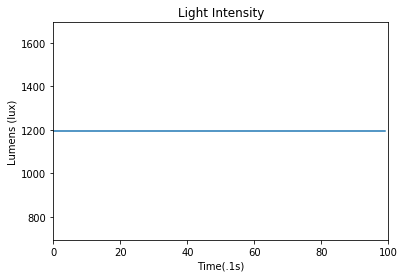

In [16]:
from time import sleep
%matplotlib inline
import matplotlib.pyplot as plt
temp = []
sample = 100
while (sample):
    temp.append(sunlight.read_visible_light())
    sleep(0.1)
    sample -= 1

print(temp)
plt.plot(range(len(temp)), temp)
plt.title('Light Intensity')
plt.xlabel("Time(.1s)")
plt.ylabel("Lumens (lux)")
min_tmp_log = min(temp) - 500
max_tmp_log = max(temp) + 500
plt.axis([0, len(temp), min_tmp_log, max_tmp_log])
plt.show()